## Customer Churn Analysis

#### From The Customer Churn Prediction 2020 competition, The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:

- "state", string. 2-letter code of the US state of customer residence
- "account_length", numerical. Number of months the customer has been with the current telco provider
- "area_code", string="area_code_AAA" where AAA = 3 digit area code.
- "international_plan", (yes/no). The customer has international plan.
- "voice_mail_plan", (yes/no). The customer has voice mail plan.
- "number_vmail_messages", numerical. Number of voice-mail messages.
- "total_day_minutes", numerical. Total minutes of day calls.
- "total_day_calls", numerical. Total minutes of day calls.
- "total_day_charge", numerical. Total charge of day calls.
- "total_eve_minutes", numerical. Total minutes of evening calls.
- "total_eve_calls", numerical. Total number of evening calls.
- "total_eve_charge", numerical. Total charge of evening calls.
- "total_night_minutes", numerical. Total minutes of night calls.
- "total_night_calls", numerical. Total number of night calls.
- "total_night_charge", numerical. Total charge of night calls.
- "total_intl_minutes", numerical. Total minutes of international calls.
- "total_intl_calls", numerical. Total number of international calls.
- "total_intl_charge", numerical. Total charge of international calls
- "number_customer_service_calls", numerical. Number of calls to customer service
- "churn", (yes/no). Customer churn - target variable.

#### Load the dataset and perform some initial exploratory data analysis

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/PJ/Downloads/Amazon Kindle Book Review/train.csv')

# Display the first few rows of the dataframe
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [7]:
# Check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

There are no missing values in the dataset, which is great as it means we don't have to handle missing data imputation for this particular dataset.

#### some exploratory data analysis (EDA) to understand the data better

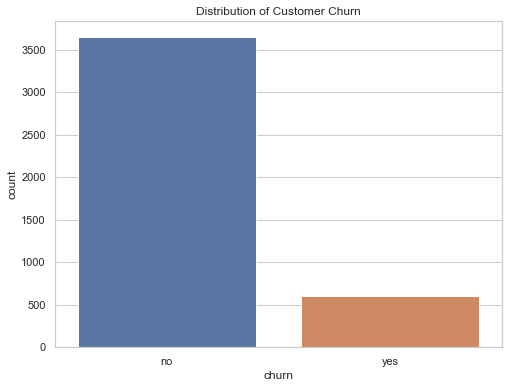

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plot
sns.set(style='whitegrid')

# Plot the distribution of the target variable 'churn'
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=df)
plt.title('Distribution of Customer Churn')
plt.show()

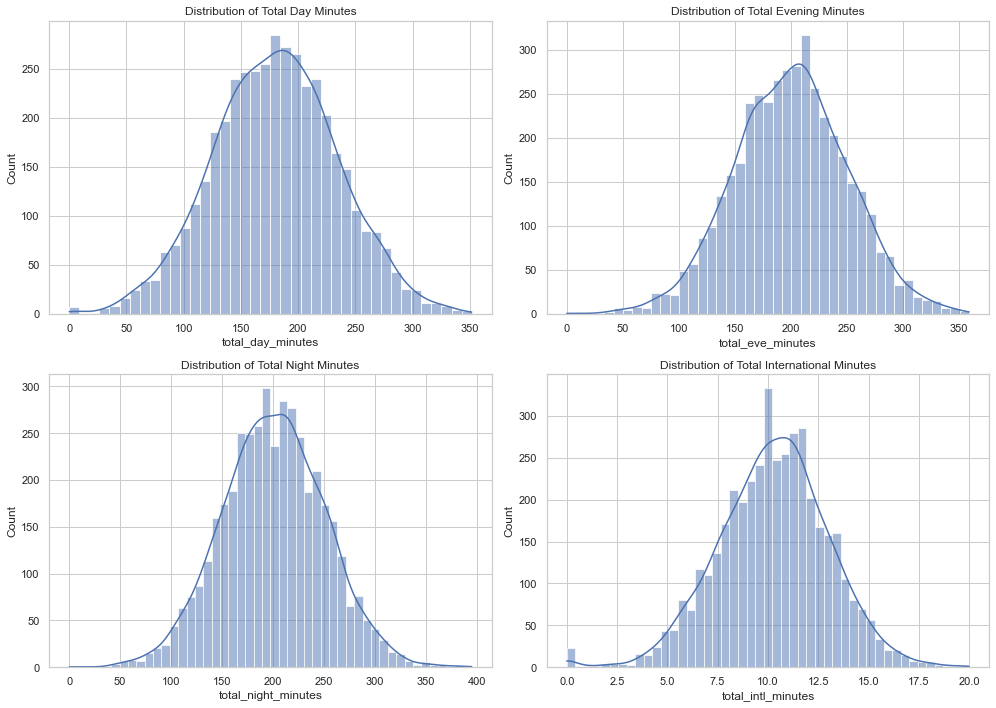

In [9]:
# Plot the distribution of some numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['total_day_minutes'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Total Day Minutes')

sns.histplot(df['total_eve_minutes'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Total Evening Minutes')

sns.histplot(df['total_night_minutes'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Total Night Minutes')

sns.histplot(df['total_intl_minutes'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Total International Minutes')

plt.tight_layout()
plt.show()

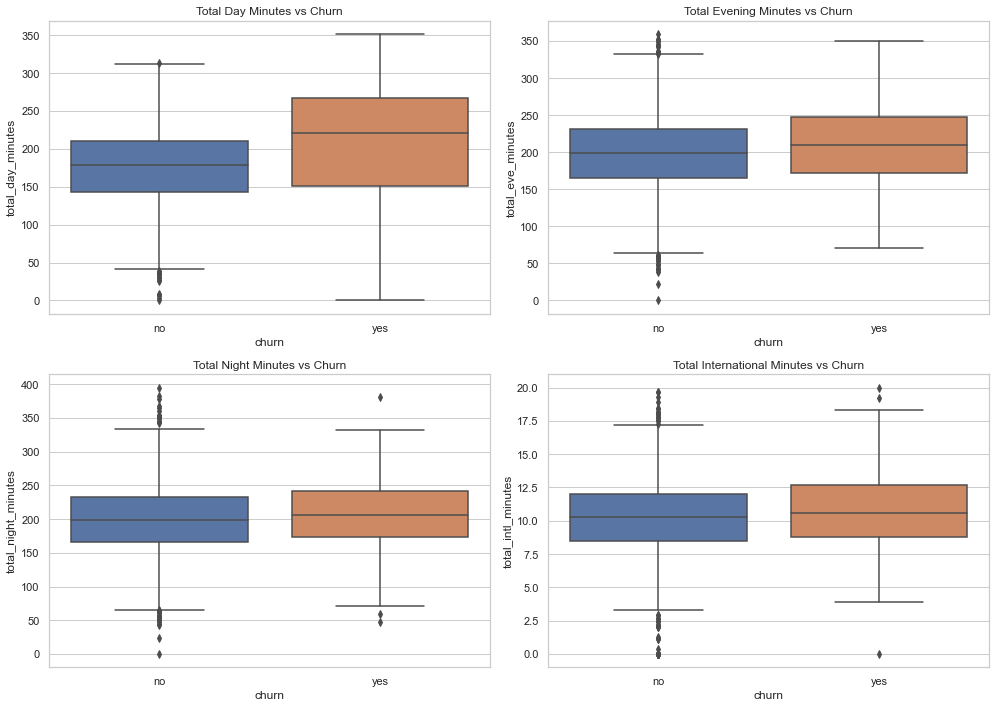

In [10]:
# Plot the relationship between some numerical features and the target variable
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x='churn', y='total_day_minutes', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Total Day Minutes vs Churn')

sns.boxplot(x='churn', y='total_eve_minutes', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Total Evening Minutes vs Churn')

sns.boxplot(x='churn', y='total_night_minutes', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Total Night Minutes vs Churn')

sns.boxplot(x='churn', y='total_intl_minutes', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Total International Minutes vs Churn')

plt.tight_layout()
plt.show()

#### From these charts, we can observe that:
- Customers who churn tend to have higher total day minutes.
- The total evening minutes are slightly higher for customers who churn, but the difference is not as pronounced as with total day minutes.
- There is no significant difference in total night minutes between customers who churn and those who don't.
- Customers who churn tend to have slightly higher total international minutes.

#### encode the categorical variables

In [11]:
from sklearn.preprocessing import LabelEncoder

# Apply one-hot encoding to 'state' and 'area_code'
df = pd.get_dummies(df, columns=['state', 'area_code'])

# Apply binary encoding to 'international_plan', 'voice_mail_plan', and 'churn'
binary_features = ['international_plan', 'voice_mail_plan', 'churn']
encoder = LabelEncoder()
for feature in binary_features:
    df[feature] = encoder.fit_transform(df[feature])

# Display the first few rows of the dataframe
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,0,0,0,0,0,0,0,0,0,1


#### Split the dataset into a training set and a test set

In [12]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = df.drop('churn', axis=1)
y = df['churn']

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the sizes of the training set and the test set
X_train.shape, X_test.shape

((3400, 71), (850, 71))

In [13]:
from sklearn.preprocessing import StandardScaler

# Define the numerical features
numerical_features = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
                      'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
                      'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes',
                      'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

# Apply feature scaling to the numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Display the first few rows of the training set
X_train.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
1340,0.375739,1,0,-0.570997,-0.003181,0.957197,-0.003240,-0.033235,1.307641,-0.032823,...,0,0,0,0,0,0,0,0,1,0
3790,0.426379,0,1,2.042109,0.194780,0.001169,0.194830,0.185139,0.347441,0.184020,...,0,0,0,0,0,0,0,0,1,0
2647,-0.586415,0,1,0.698226,0.457495,-0.803907,0.457109,0.010841,0.094757,0.011960,...,0,0,0,0,0,0,0,1,0,0
4009,-1.092812,0,0,-0.570997,0.403842,0.001169,0.403783,-0.632260,-0.511685,-0.631499,...,1,0,0,0,0,0,0,0,1,0
3537,0.299780,0,0,-0.570997,-0.408354,0.353390,-0.408087,-0.379828,0.044220,-0.379301,...,0,0,0,1,0,0,0,0,1,0


Now that our data is preprocessed, we can proceed to build the Customer Churn Prediction model. We'll use a Random Forest Classifier for this task.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       721
           1       0.97      0.67      0.79       129

    accuracy                           0.95       850
   macro avg       0.95      0.83      0.88       850
weighted avg       0.95      0.95      0.94       850



 the recall for class 1 (churn) is relatively low at 67%. This means that the model is missing about a third of the customers who do churn. This is likely due to the imbalance in the dataset, with much fewer instances of churned customers.

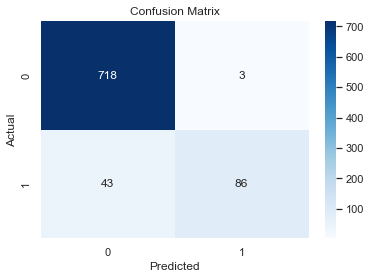

In [15]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

####  create a new feature that represents the total charge per call for day, evening, and night calls. This might be a better indicator of churn than the total charges and total calls separately.

In [16]:
# Create new features for total charge per call
X_train['total_day_charge_per_call'] = X_train['total_day_charge'] / X_train['total_day_calls']
X_train['total_eve_charge_per_call'] = X_train['total_eve_charge'] / X_train['total_eve_calls']
X_train['total_night_charge_per_call'] = X_train['total_night_charge'] / X_train['total_night_calls']

X_test['total_day_charge_per_call'] = X_test['total_day_charge'] / X_test['total_day_calls']
X_test['total_eve_charge_per_call'] = X_test['total_eve_charge'] / X_test['total_eve_calls']
X_test['total_night_charge_per_call'] = X_test['total_night_charge'] / X_test['total_night_calls']

# Display the first few rows of the training set
X_train.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,total_day_charge_per_call,total_eve_charge_per_call,total_night_charge_per_call
1340,0.375739,1,0,-0.570997,-0.003181,0.957197,-0.003240,-0.033235,1.307641,-0.032823,...,0,0,0,0,0,1,0,-0.003385,-0.025101,-0.228598
3790,0.426379,0,1,2.042109,0.194780,0.001169,0.194830,0.185139,0.347441,0.184020,...,0,0,0,0,0,1,0,166.644115,0.529644,0.765532
2647,-0.586415,0,1,0.698226,0.457495,-0.803907,0.457109,0.010841,0.094757,0.011960,...,0,0,0,0,1,0,0,-0.568609,0.126214,-2.799822
4009,-1.092812,0,0,-0.570997,0.403842,0.001169,0.403783,-0.632260,-0.511685,-0.631499,...,0,0,0,0,0,1,0,345.368264,1.234154,0.663582
3537,0.299780,0,0,-0.570997,-0.408354,0.353390,-0.408087,-0.379828,0.044220,-0.379301,...,1,0,0,0,0,1,0,-1.154777,-8.577636,0.000332


train a Gradient Boosting Classifier on the updated training set.

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       721
           1       0.91      0.81      0.86       129

    accuracy                           0.96       850
   macro avg       0.94      0.90      0.92       850
weighted avg       0.96      0.96      0.96       850



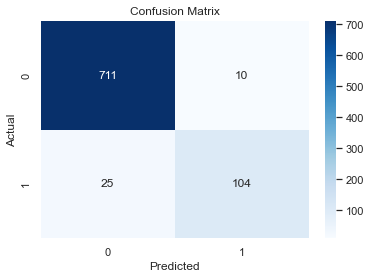

In [18]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()